# Term Deposit Sale Project of a Bank

## Understanding Attributes Present in the Dataset 
1. Bank Client Data
2. Age
3. Job
4. Marital
5. Education
6. Default: Has Credit in default?
7. Housing: Has housing loan?
8. Loan: Has personal loan? 
9. Balance: Balance in amount
### Related to Previous Contact Data
10. Contact: Contact communication type
11. Month: Last contact month of the year
12. day_of_week: Last contact day of the week
13. Duration: Last contact duration in seconds
### Other Attributes 
14. Campaign: No.of contacts performed during this campaign for this client
15. Pdays: No.of days passed by after the client was last contacted from previous campaign
16. Previous: No.of contacts performed before this campaign for this client
17. Poutcome: Outcome of the previous marketing campaign

# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings                     # Ignores warnings if any
warnings.filterwarnings("ignore")

In [2]:
bankdf = pd.read_csv('bank-full.csv') 

In [3]:
bankdf

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
0        unknown    5   may       261         1     -1         0  unknown   
1        unknown    5   may       151         1     -1         0  unknown   
2        unknown    5   may        76         1     -1         0  unknown   
3        unknown    5   may        92         1     -1         0  unknown   
4        unknown    5   may       198         1     -1         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
45206   cellular   17   nov       977         3     -1         0  unknown   
45207   cellular   17   nov       456         2     -1         0  unknown   
45208   cellular   17   nov      1127         5    184         3  success   
45209  telephone   17   nov       508         4     -1         0  unknown   
45210   cellular   17   nov       361         2    188        11    other   

      Target  
0         no  
1         no  
2         no  
3         no  
4         no  
...      ...  
45206    yes  
45207    yes  
45208    yes  
45209     no  
45210     no  

[45211 rows x 17 columns]

In [4]:
bankdf.shape # Checks no. of rows and columns 

(45211, 17)

In [5]:
bankdf.head() 

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no

In [6]:
bankdf.tail()

age           job   marital  education default  balance housing loan  \
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
45206   cellular   17   nov       977         3     -1         0  unknown   
45207   cellular   17   nov       456         2     -1         0  unknown   
45208   cellular   17   nov      1127         5    184         3  success   
45209  telephone   17   nov       508         4     -1         0  unknown   
45210   cellular   17   nov       361         2    188        11    other   

      Target  
45206    yes  
45207    yes  
45208    yes  
45209     no  
45210     no

In [7]:
bankdf.dtypes # Whererver 'object' is displayed, it is categorical column ; else it is numerical

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [8]:
bankdf.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Checking for NULL values

In [10]:
bankdf.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

## Drop Duplicate values (if any)

In [11]:
bankdf.drop_duplicates(inplace = True)
bankdf.shape

(45211, 17)

## Displaying Statistical Summary

In [12]:
bankdf.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

#### For normal distribution, mean = median
#### If mean != median, there is some skewness in data
#### If there is a huge difference between 75% quartile range and max, there might be a presence of outliers

## Univariate Analysis on Numerical Columns

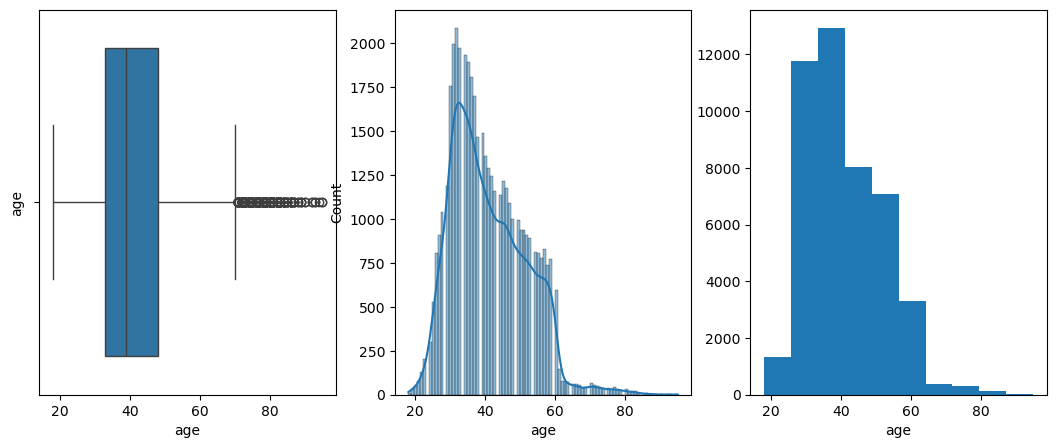

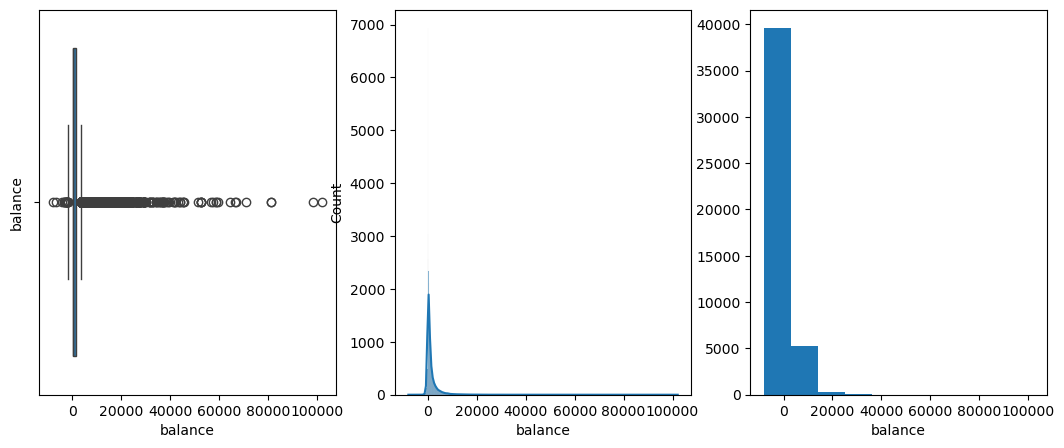

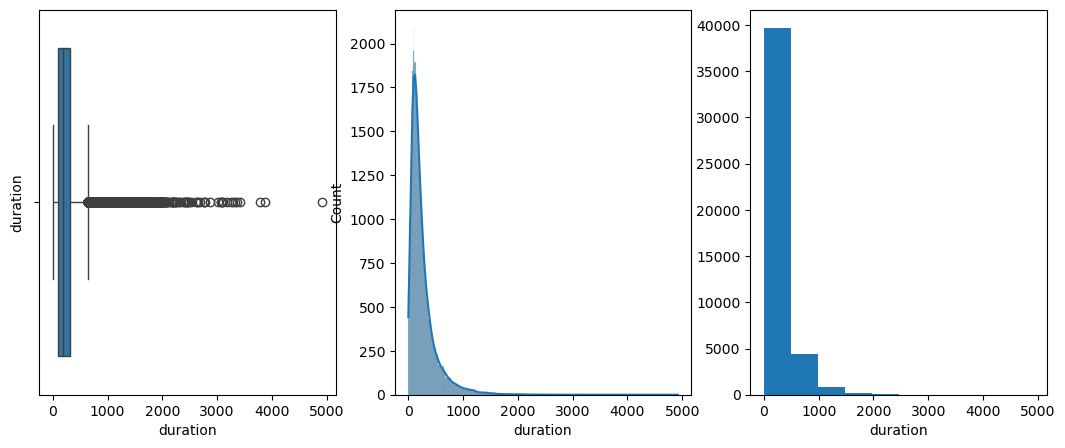

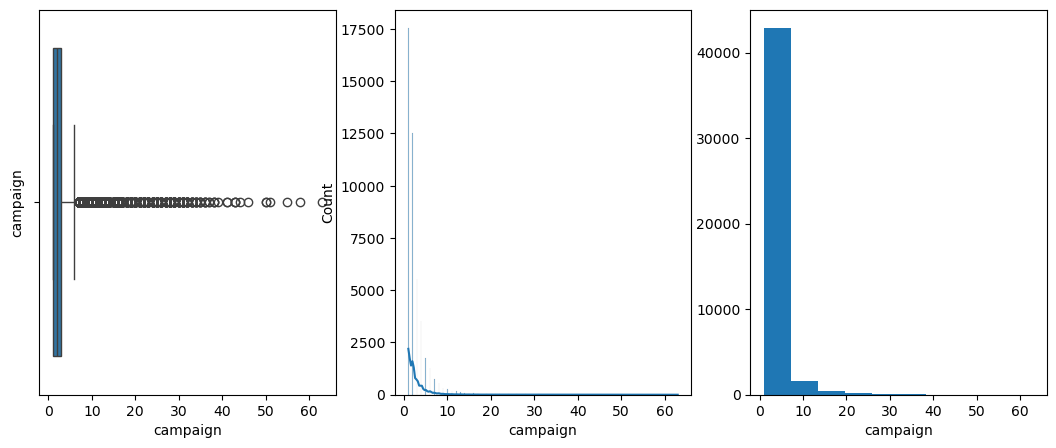

In [13]:
columns = ['age', 'balance', 'duration', 'campaign']

for each in columns:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13,5))
    # BOX PLOT
    # IQR = q3-q1
    # Any value greater than q3 + 1.5(IQR) or lesser than q1 - 1.5(IQR) is considered an Outlier  
    sns.boxplot(x=each, data=bankdf, ax=ax1)
    ax1.set_xlabel(each, fontsize=10)
    ax1.set_ylabel(each, fontsize=10)
    ax1.tick_params(labelsize=10)
    
    # DISTPLOT
    # Outliers present if the graph is rightly skewed
    sns.histplot(bankdf[each], kde=True,ax=ax2)
    ax2.set_xlabel(each, fontsize=10)
    ax2.tick_params(labelsize=10)
    
    # HISTOGRAM
    # Outliers present if the graph is rightly skewed
    ax3.hist(bankdf[each])
    ax3.set_xlabel(each, fontsize=10)
    ax3.tick_params(labelsize=10)

## Univariate Analysis on Categorical Columns

In [14]:
bankdf['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [15]:
bankdf['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [16]:
bankdf['education'].value_counts() 

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [17]:
bankdf['default'].value_counts() # Default represents whether the customer has defaulted on any credit or not

no     44396
yes      815
Name: default, dtype: int64

In [18]:
bankdf['default'].value_counts(normalize=True) # Used to find percentage 

no     0.981973
yes    0.018027
Name: default, dtype: float64

#### Since 'yes' is only about 2% whereas 'no' is 98% we can not rely on this column
#### Hence we can remove this column

In [19]:
bankdf.drop(['default'], axis=1, inplace=True) # Since it is columnwise, we put axis=1 ; else axis=0

In [20]:
bankdf.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'Target'],
      dtype='object')

In [21]:
bankdf['housing'].value_counts(normalize=True) # Finding percentage 

yes    0.555838
no     0.444162
Name: housing, dtype: float64

In [22]:
bankdf['loan'].value_counts(normalize=True)

no     0.839774
yes    0.160226
Name: loan, dtype: float64

In [23]:
bankdf['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [24]:
bankdf['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [25]:
bankdf['Target'].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: Target, dtype: float64

In [26]:
bankdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   loan       45211 non-null  object
 7   contact    45211 non-null  object
 8   day        45211 non-null  int64 
 9   month      45211 non-null  object
 10  duration   45211 non-null  int64 
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  poutcome   45211 non-null  object
 15  Target     45211 non-null  object
dtypes: int64(7), object(9)
memory usage: 5.9+ MB


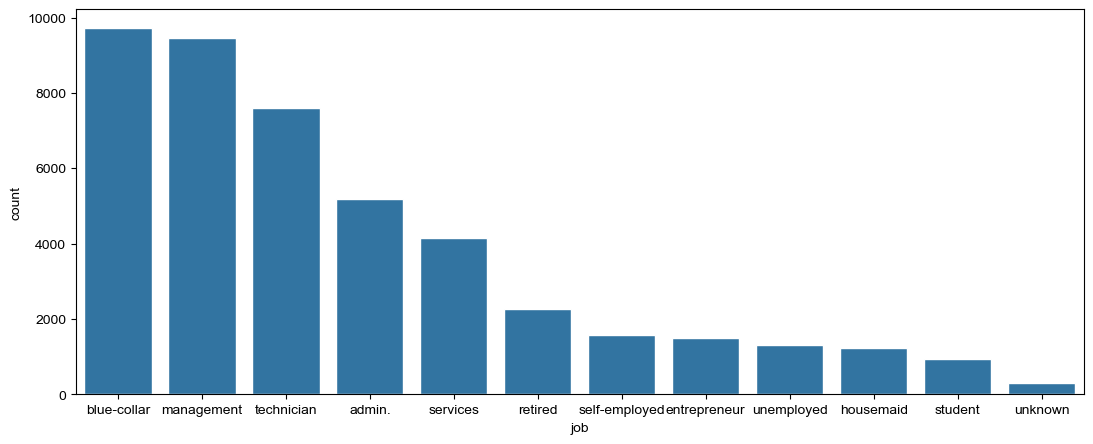

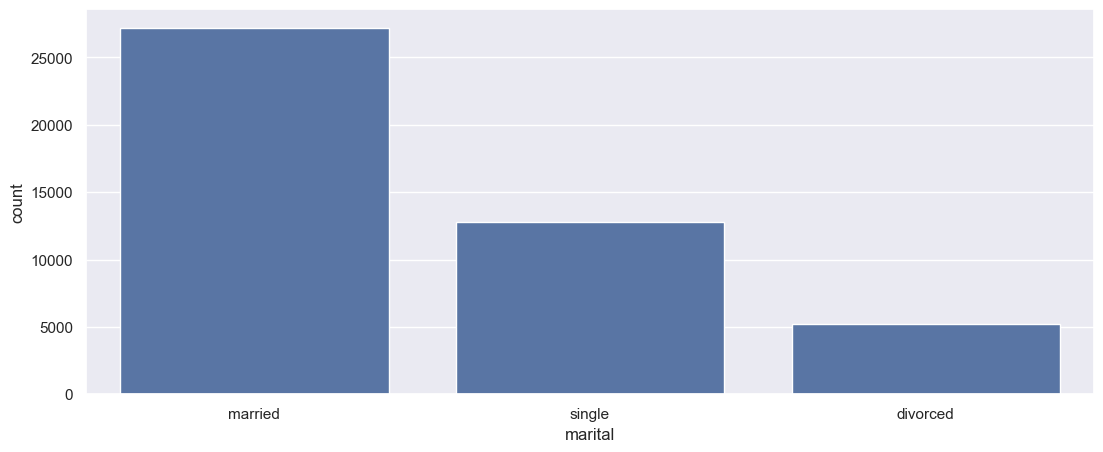

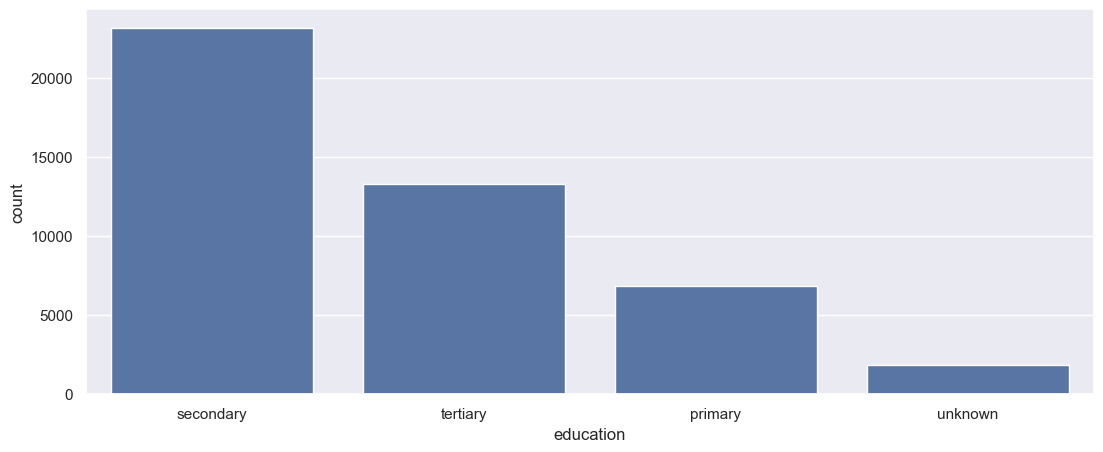

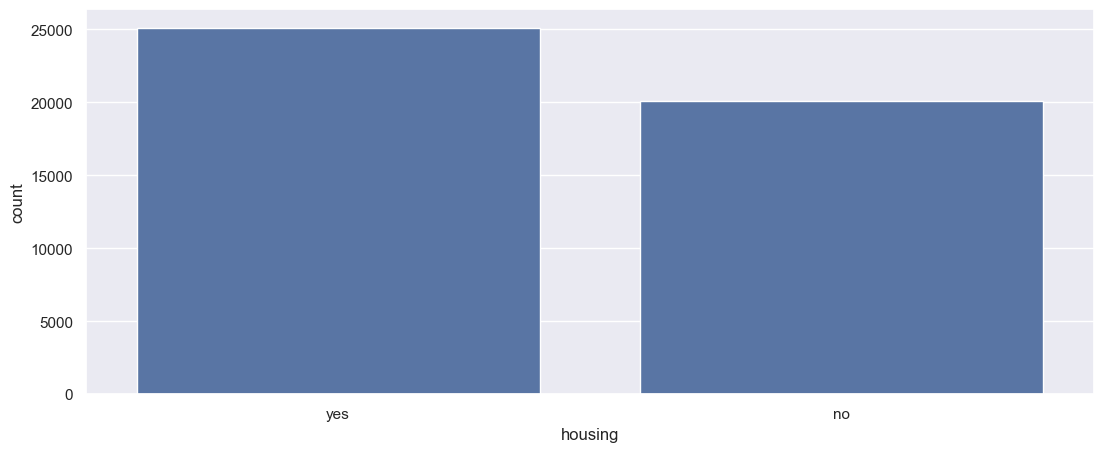

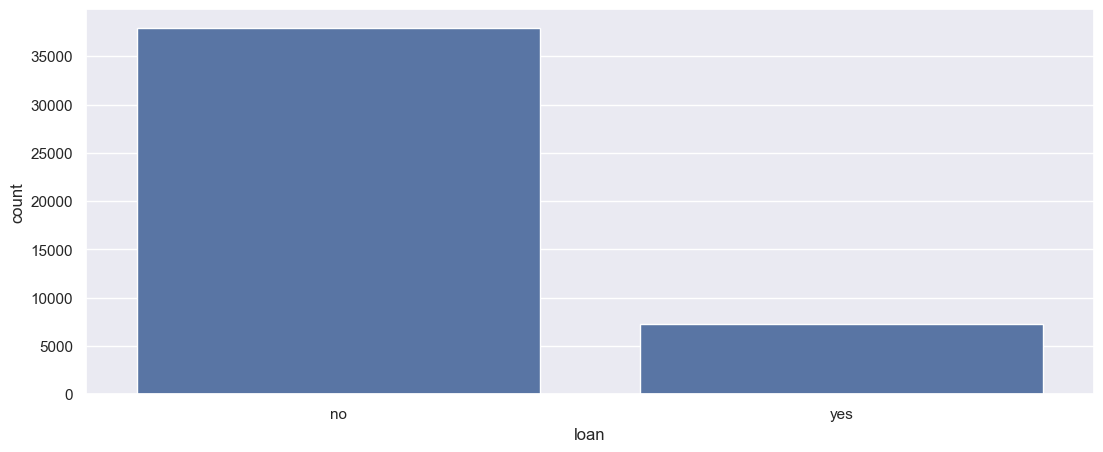

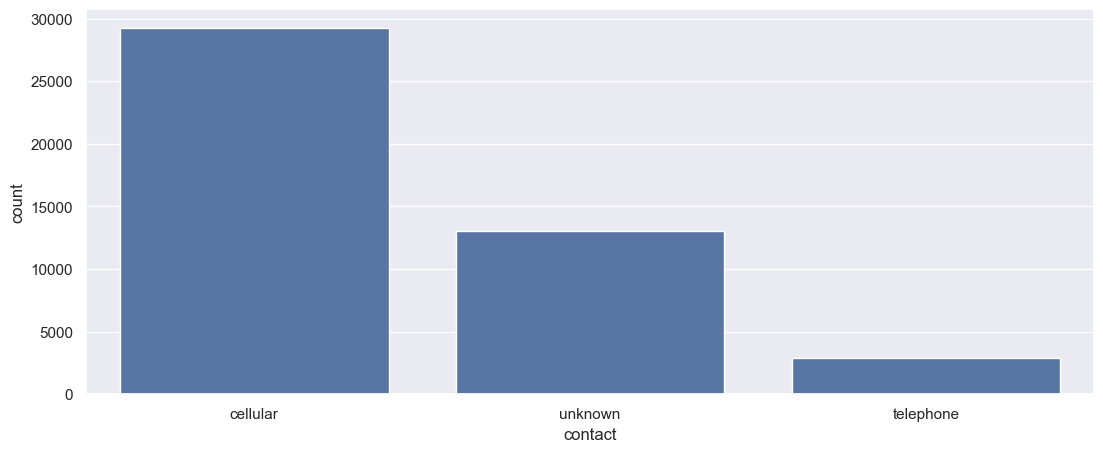

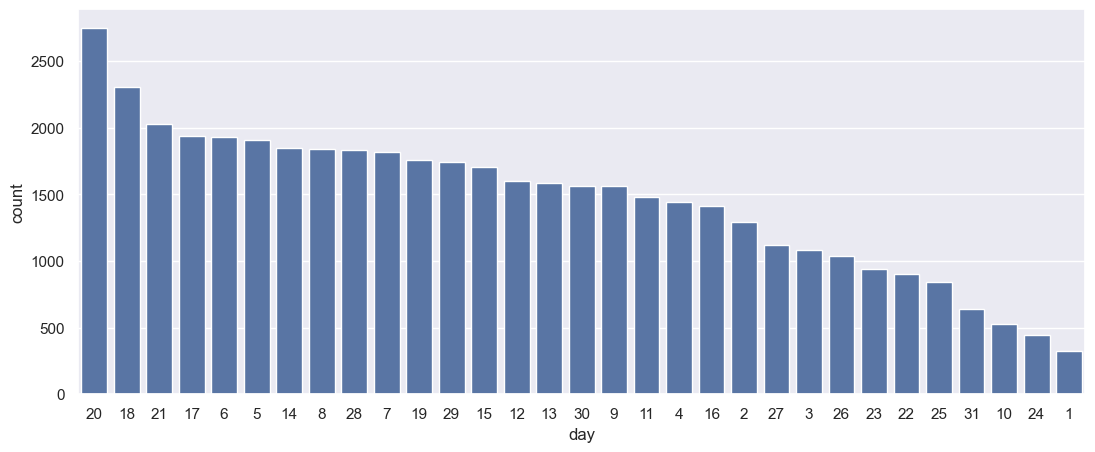

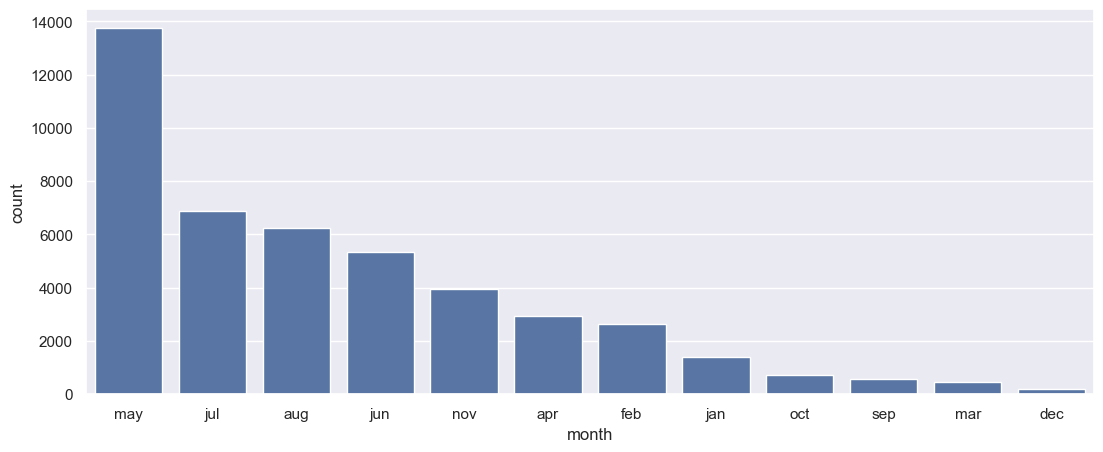

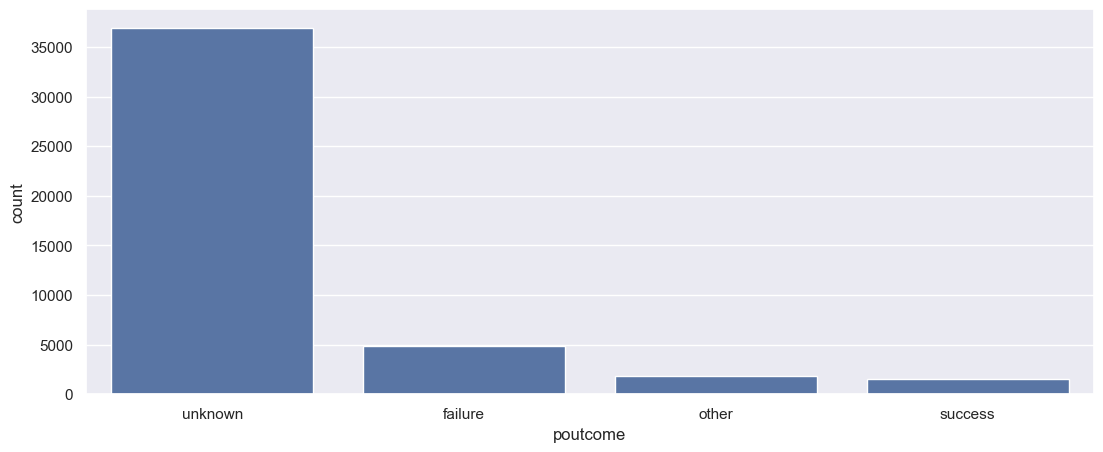

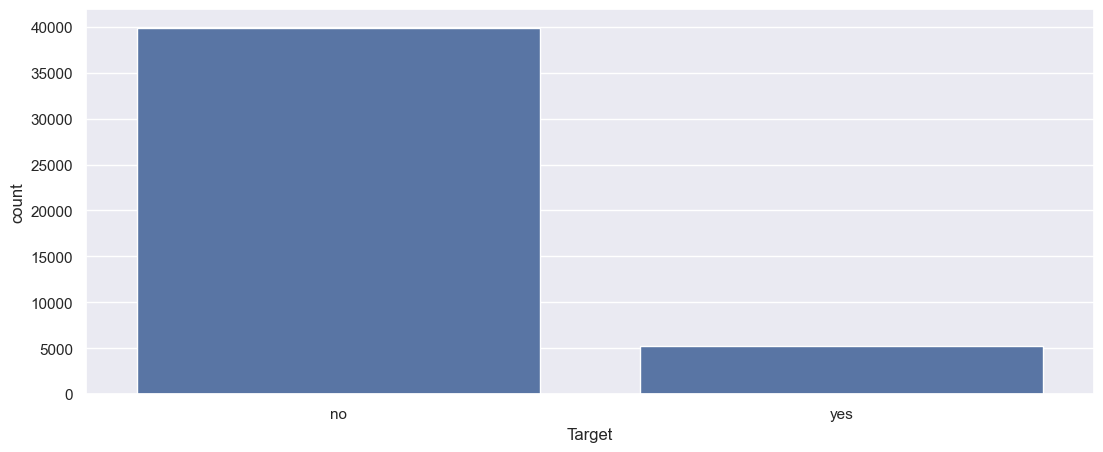

In [27]:
columns = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'day', 'month', 'poutcome', 'Target']
for i in columns:
    fig, axes = plt.subplots(1, 1, figsize=(13,5))
    sns.set(style='darkgrid')
    sns.countplot(x = i, data = bankdf, order = bankdf[i].value_counts().index)
    plt.show()

## Bivariate Analysis using Pairplot on Numerical Predictor columns

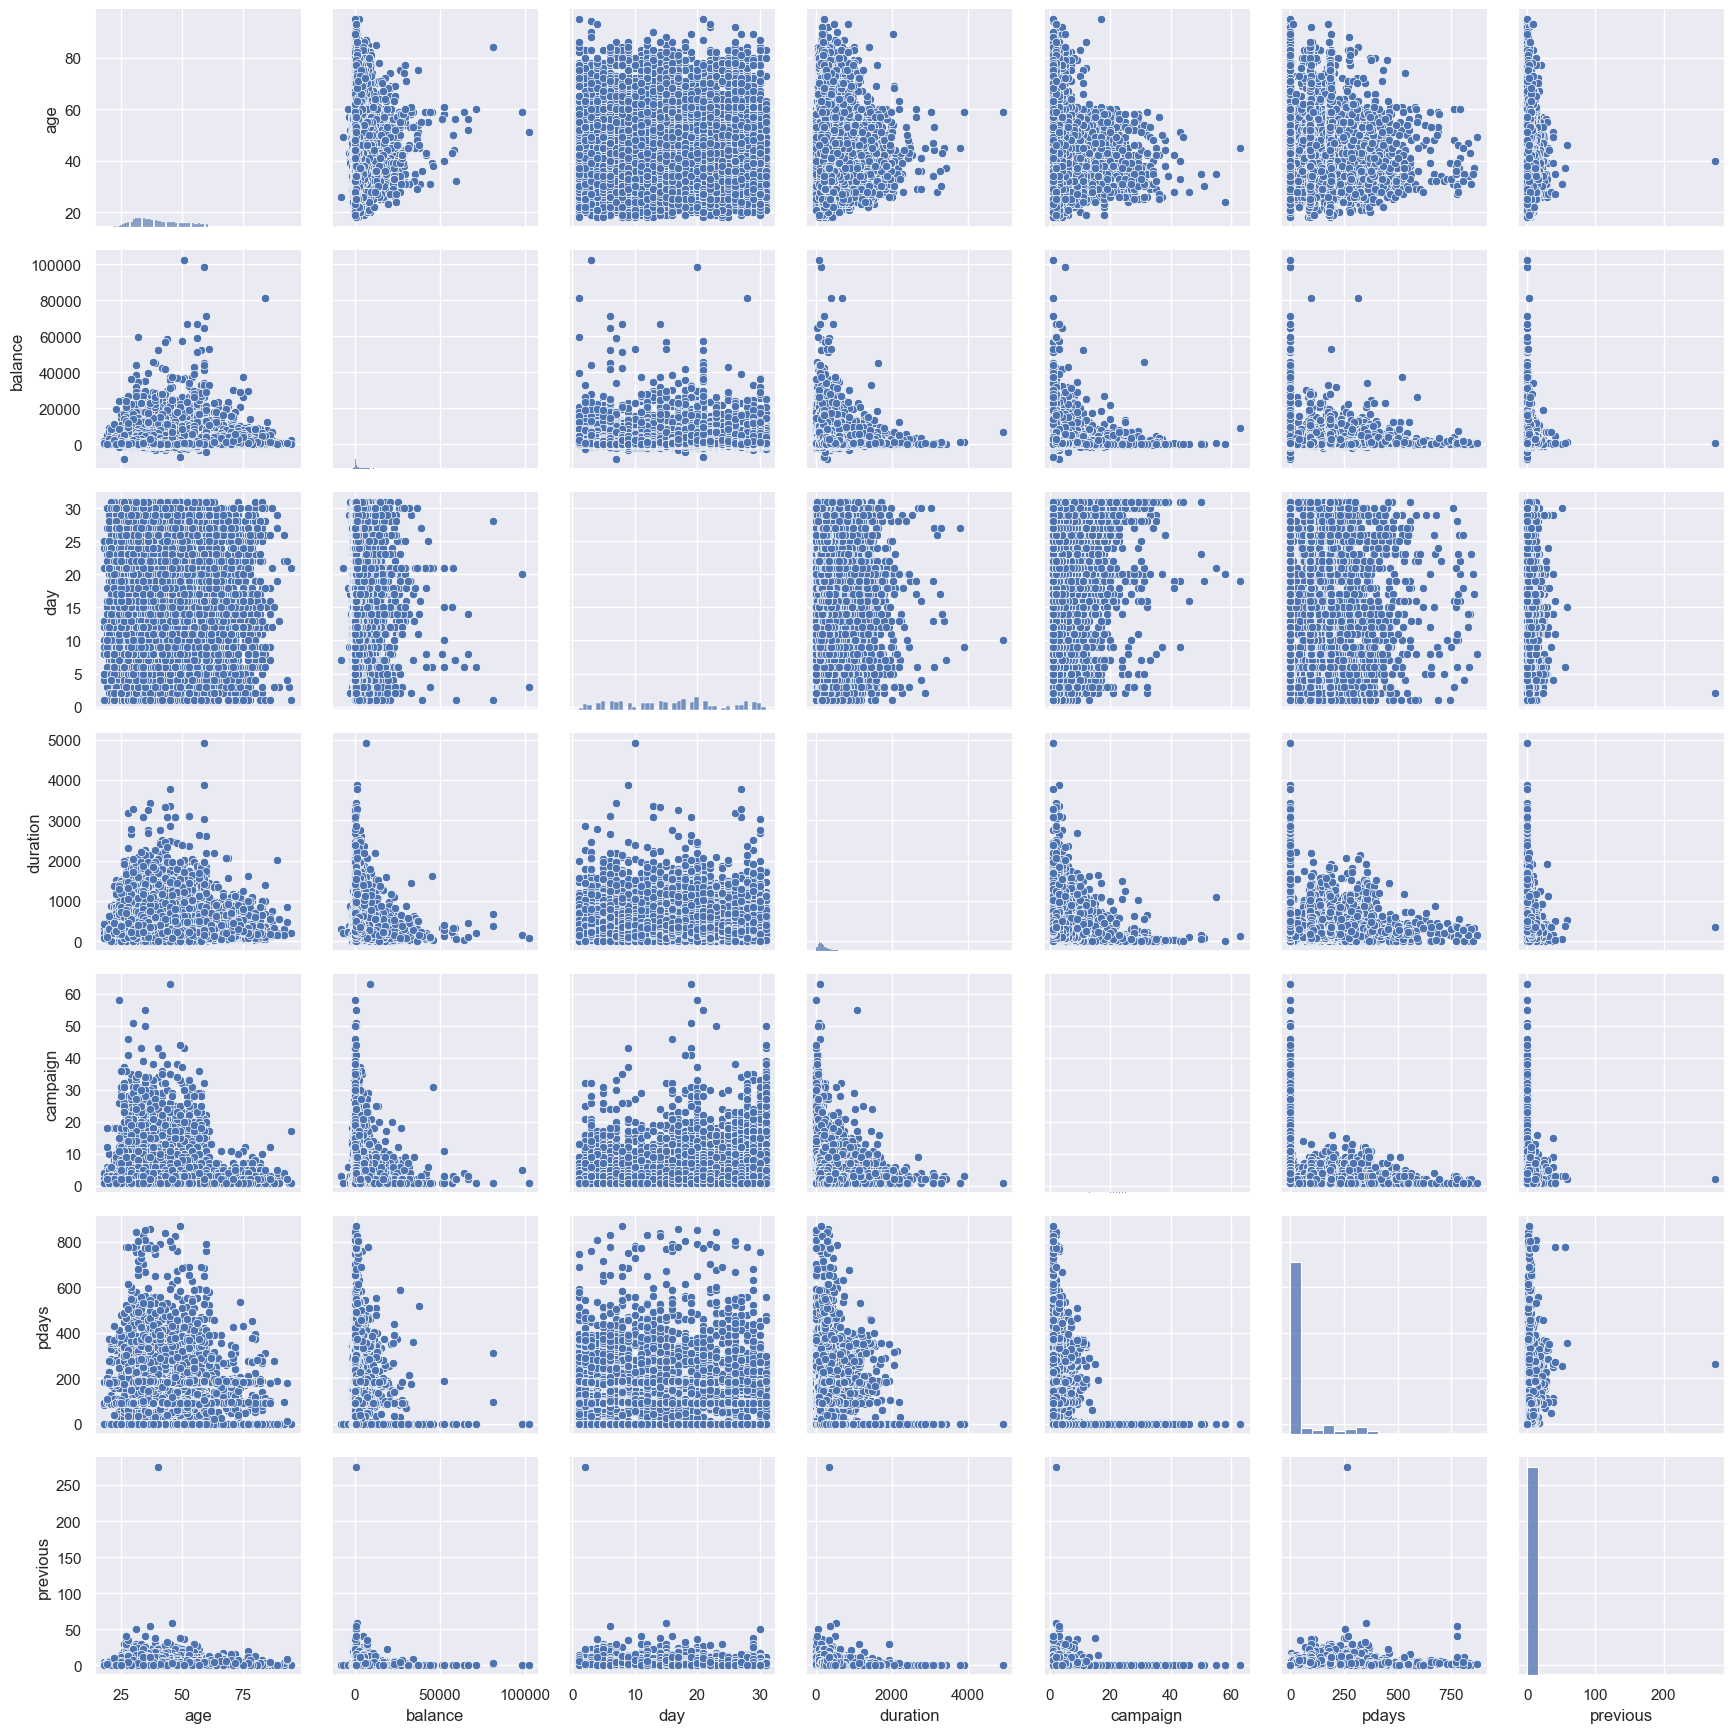

In [28]:
sns.pairplot(bankdf)
plt.tight_layout()

## Bivariate Analysis using Crosstab between Numerical Predictor columns and Target

In [29]:
# Group numerical variables by mean for the target variable 
np.round(bankdf.groupby(['Target']).mean(), 1)

age  balance   day  duration  campaign  pdays  previous
Target                                                          
no      40.8   1303.7  15.9     221.2       2.8   36.4       0.5
yes     41.7   1804.3  15.2     537.3       2.1   68.7       1.2

The mean balance is higher for customers who subscribed to the term deposit compared to those who don't

No.of days that passed by after the client was last contacted from a previous campaign is higher for people who have subscribed

No.of contacts performed before this campaign is also higher for customers who subscribe 

#### All the above facts indicate that customers with a higher balance and those who have been contacted frequently before the campaign tend to subscribe for the term deposit

In [30]:
pd.crosstab(bankdf['job'], bankdf['Target'], normalize='index').sort_values(by='yes', ascending=False)

Target               no       yes
job                              
student        0.713220  0.286780
retired        0.772085  0.227915
unemployed     0.844973  0.155027
management     0.862444  0.137556
admin.         0.877973  0.122027
self-employed  0.881571  0.118429
unknown        0.881944  0.118056
technician     0.889430  0.110570
services       0.911170  0.088830
housemaid      0.912097  0.087903
entrepreneur   0.917283  0.082717
blue-collar    0.927250  0.072750

From this we can understand that customers whose job role is 'student' have subscribed the most to Term Deposit

In [31]:
pd.crosstab(bankdf['marital'], bankdf['Target'], normalize='index').sort_values(by='yes', ascending=False)

Target          no       yes
marital                     
single    0.850508  0.149492
divorced  0.880545  0.119455
married   0.898765  0.101235

# Data Preprocessing

In [32]:
# Handling Outliers - IQR strategy

def RemoveOutliers(df, col_name):
    q1 = df[col_name].quantile(.25)
    q3 = df[col_name].quantile(.75)
    iqr = q3 - q1
    upperlimit = q3 + (1.5 * iqr)
    lowerlimit = q1 - (1.5 * iqr)
    a = df[col_name] > upperlimit
    b = df[col_name] < lowerlimit
    df[col_name] = np.where(a, upperlimit, df[col_name])
    df[col_name] = np.where(b, lowerlimit, df[col_name])
    return df

In [33]:
# Removing outliers from 'age' column

bankdf = RemoveOutliers(bankdf, 'age')

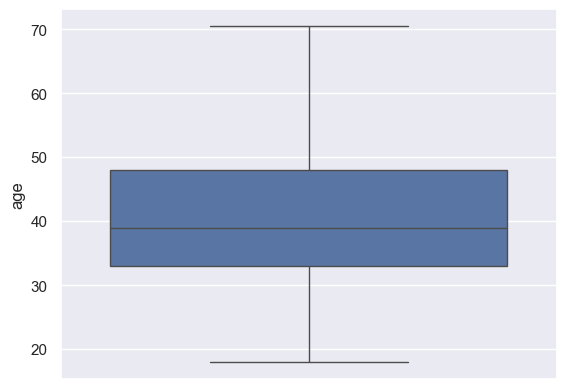

In [34]:
# Visualizing
sns.boxplot(bankdf['age'])
plt.show()

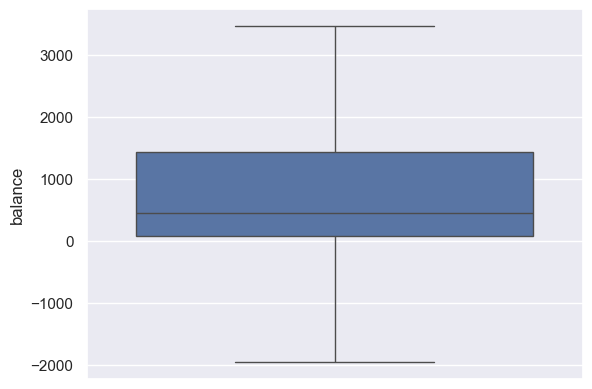

In [35]:
bankdf = RemoveOutliers(bankdf, 'balance')
sns.boxplot(bankdf['balance'])
plt.show()

In [36]:
bankdf.isna().sum() # Checking no.of NULL values 

age          0
job          0
marital      0
education    0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

#### Categorical Attributes with NULL values should be replaced using 'Mode'

In [37]:
bankdf['education'].mode()

0    secondary
Name: education, dtype: object

In [38]:
bankdf['poutcome'].mode()

0    unknown
Name: poutcome, dtype: object

In [39]:
bankdf['contact'].mode()

0    cellular
Name: contact, dtype: object

## Label Encoding of Categorical Data Columns


In [40]:
bankdf['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [41]:
bankdf['job'] = bankdf['job'].map({'management': 0, 'technician': 1, 'entrepreneur': 2, 'blue-collar': 3, 'unknown': 4,
                                  'retired': 5, 'admin.': 6, 'services': 7, 'self-employed': 8, 'unemployed': 9,
                                  'housemaid': 10, 'student': 11})
bankdf['job'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [42]:
bankdf['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [43]:
bankdf['marital'] = bankdf['marital'].map({'married': 0, 'single': 1, 'divorced': 2})
bankdf['marital'].unique()

array([0, 1, 2], dtype=int64)

In [44]:
#bankdf['marital'] = bankdf['marital'].map({'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3})
#bankdf['marital'].unique()

In [45]:
bankdf['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [46]:
bankdf['education'] = bankdf['education'].map({'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3})
bankdf['education'].unique()

array([3, 2, 0, 1], dtype=int64)

In [47]:
bankdf['housing'] = bankdf['housing'].map({'no':0, 'yes':1})
bankdf['housing'].unique()

array([1, 0], dtype=int64)

In [48]:
bankdf['loan'] = bankdf['loan'].map({'no':0, 'yes':1})
bankdf['loan'].unique()

array([0, 1], dtype=int64)

In [49]:
bankdf['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [50]:
bankdf['contact'] = bankdf['contact'].map({'unknown':0, 'cellular':1, 'telephone': 2})
bankdf['contact'].unique()

array([0, 1, 2], dtype=int64)

In [51]:
bankdf['day'].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31],
      dtype=int64)

In [52]:
bankdf['Target'] = bankdf['Target'].map({'no':0, 'yes':1})
bankdf['Target'].unique()

array([0, 1], dtype=int64)

In [53]:
bankdf['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [54]:
bankdf['month'] = bankdf['month'].map({'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
                                      'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12})
bankdf['month'].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9], dtype=int64)

In [55]:
bankdf['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [56]:
bankdf['poutcome'] = bankdf['poutcome'].map({'unknown': 0, 'failure': 1, 'other': 2, 'success': 3})
bankdf['poutcome'].unique()

array([0, 1, 2, 3], dtype=int64)

In [57]:
bankdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  float64
 1   job        45211 non-null  int64  
 2   marital    45211 non-null  int64  
 3   education  45211 non-null  int64  
 4   balance    45211 non-null  float64
 5   housing    45211 non-null  int64  
 6   loan       45211 non-null  int64  
 7   contact    45211 non-null  int64  
 8   day        45211 non-null  int64  
 9   month      45211 non-null  int64  
 10  duration   45211 non-null  int64  
 11  campaign   45211 non-null  int64  
 12  pdays      45211 non-null  int64  
 13  previous   45211 non-null  int64  
 14  poutcome   45211 non-null  int64  
 15  Target     45211 non-null  int64  
dtypes: float64(2), int64(14)
memory usage: 5.9 MB


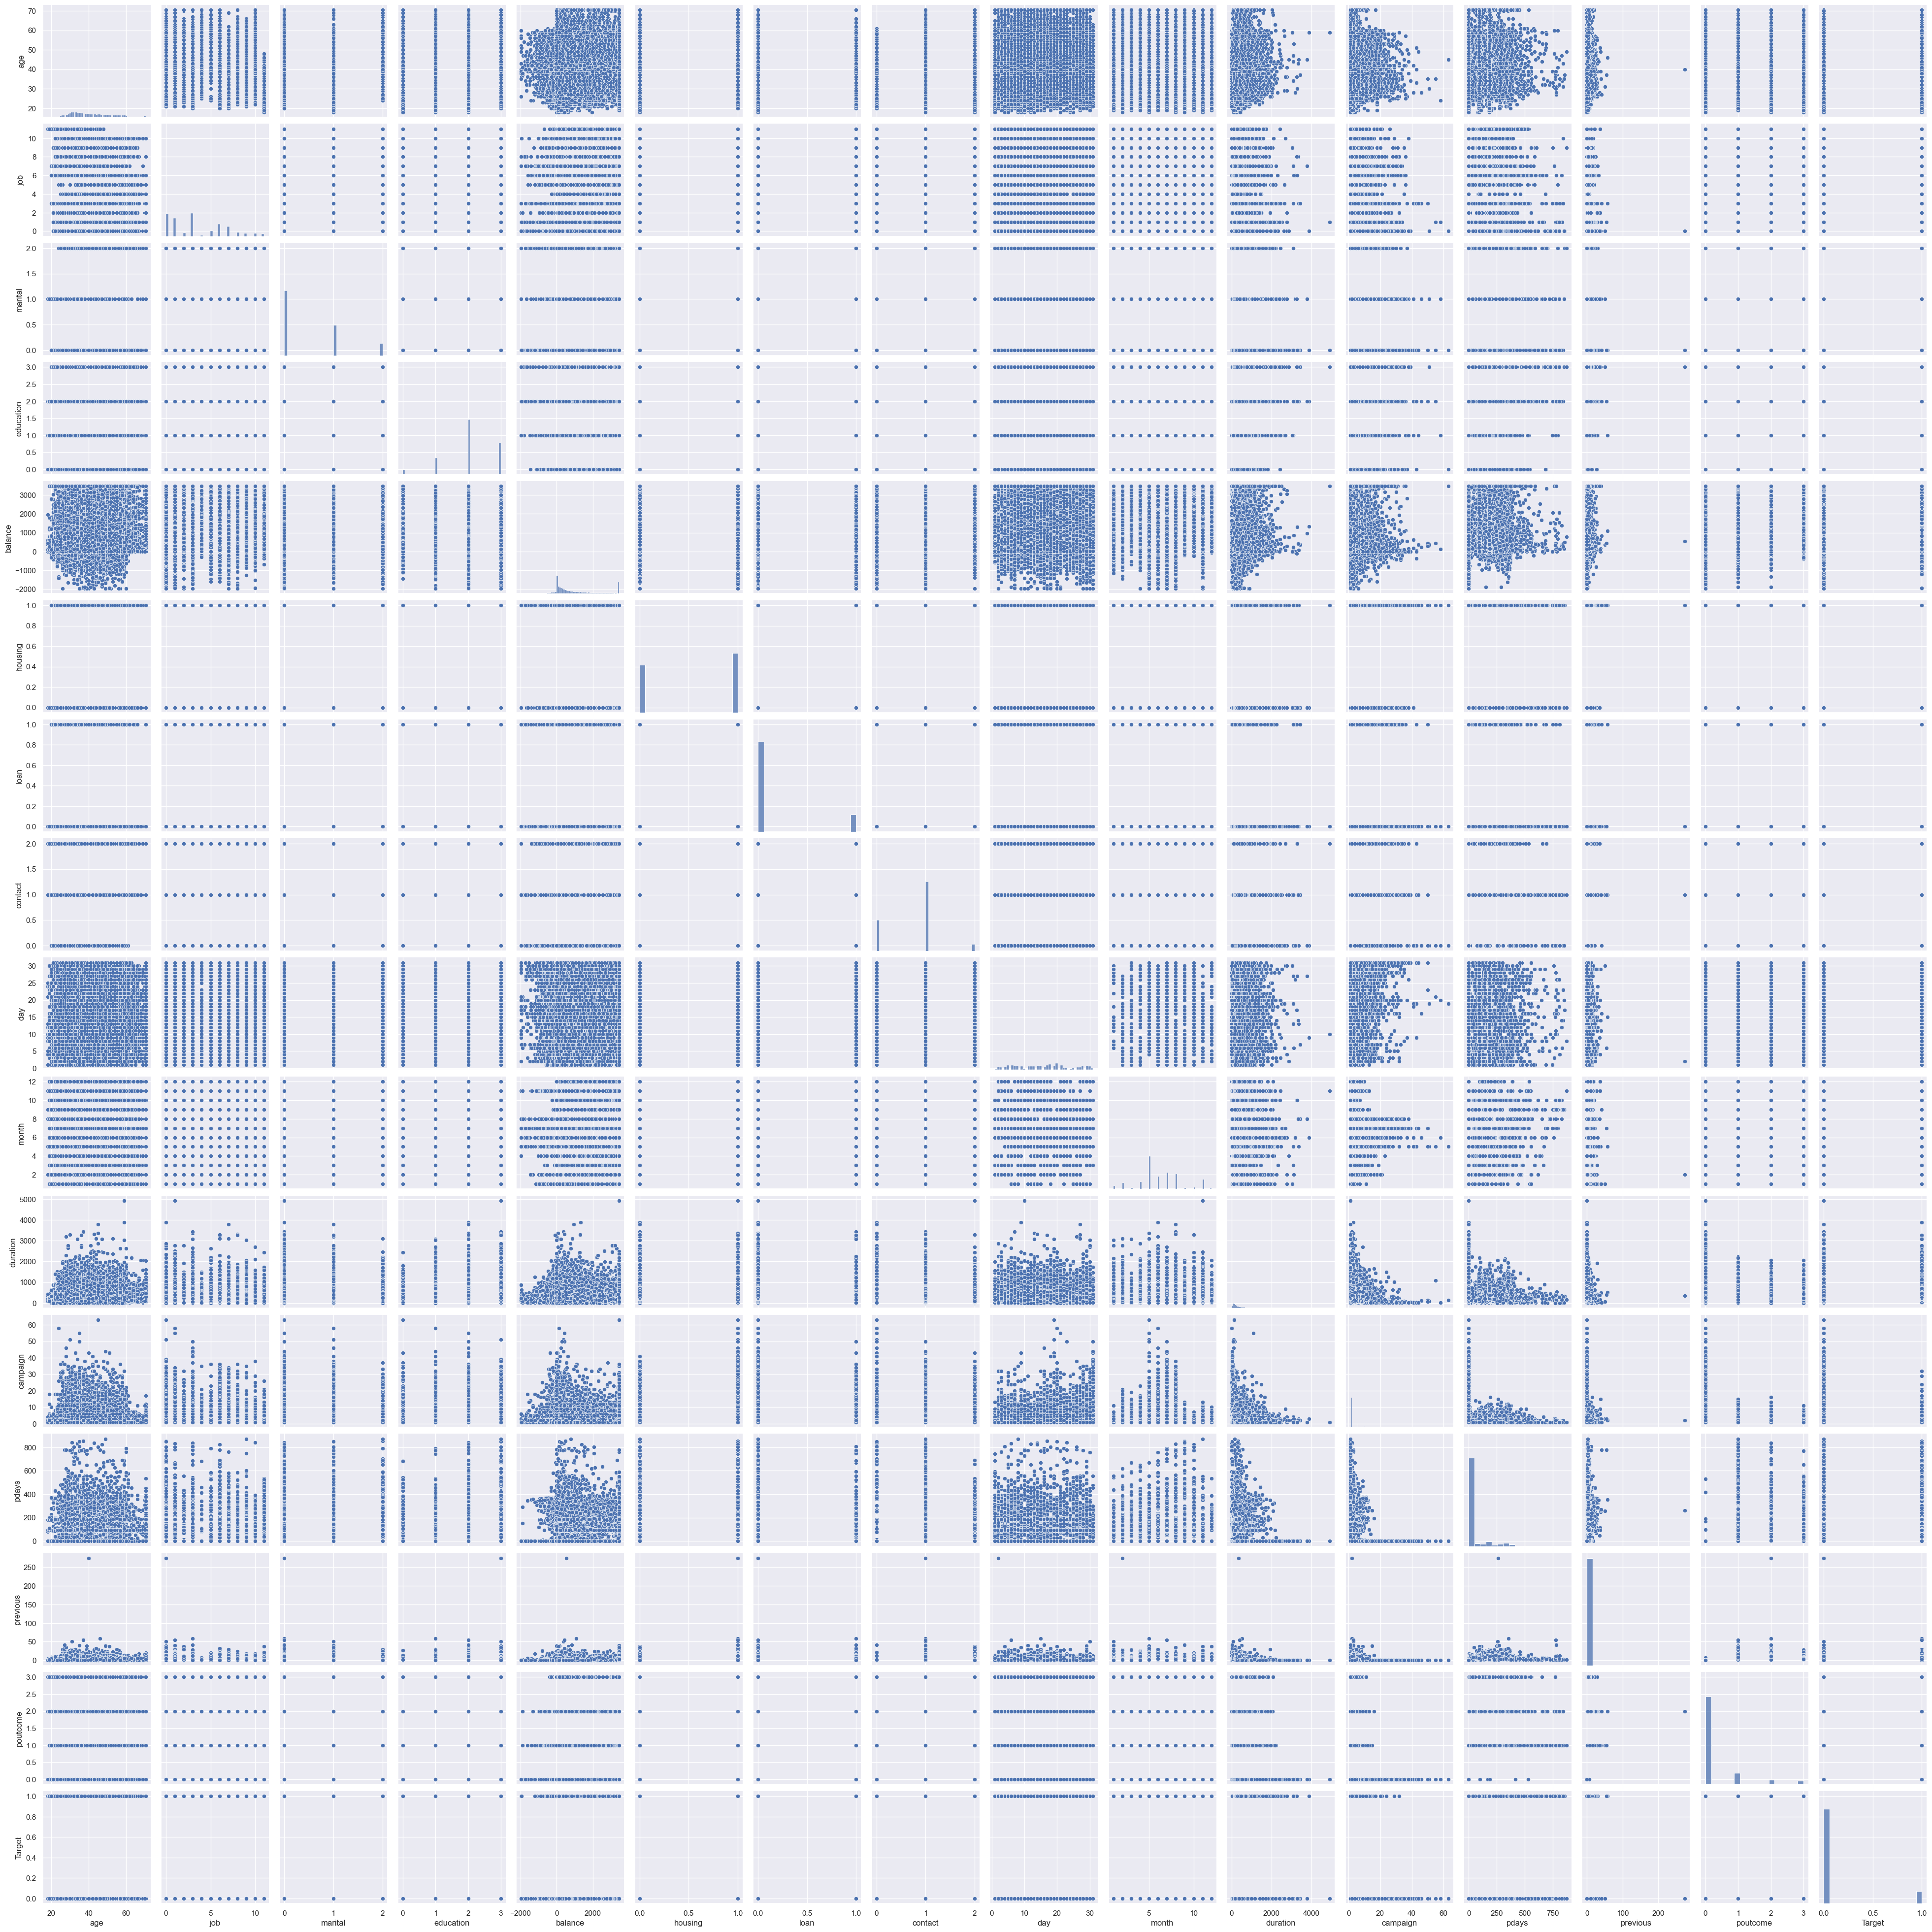

In [58]:
sns.pairplot(bankdf) # Displays pairplot for all attributes

<Axes: >

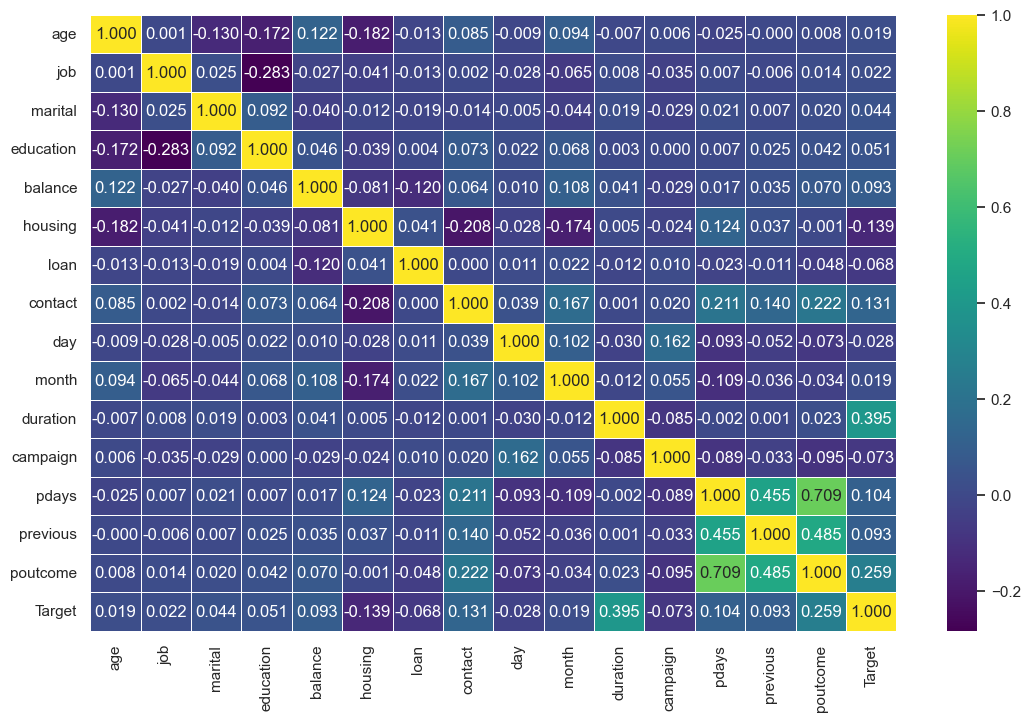

In [59]:


plt.figure(figsize = (13,8))
sns.heatmap(bankdf.corr(),
           annot = True,
           linewidth = .5,
           cmap = "viridis",
           fmt='.3f')#jet,plasma,

In [60]:
bankdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  float64
 1   job        45211 non-null  int64  
 2   marital    45211 non-null  int64  
 3   education  45211 non-null  int64  
 4   balance    45211 non-null  float64
 5   housing    45211 non-null  int64  
 6   loan       45211 non-null  int64  
 7   contact    45211 non-null  int64  
 8   day        45211 non-null  int64  
 9   month      45211 non-null  int64  
 10  duration   45211 non-null  int64  
 11  campaign   45211 non-null  int64  
 12  pdays      45211 non-null  int64  
 13  previous   45211 non-null  int64  
 14  poutcome   45211 non-null  int64  
 15  Target     45211 non-null  int64  
dtypes: float64(2), int64(14)
memory usage: 5.9 MB


## One-Hot Encoding

In [61]:
bankdf1 = pd.read_csv('bank-full.csv') # Creating Dummy columns for One hot encoding 
bankdfOneHotEn = pd.get_dummies(bankdf1, drop_first = True)
bankdfOneHotEn.head()

age  balance  day  duration  campaign  pdays  previous  job_blue-collar  \
0   58     2143    5       261         1     -1         0                0   
1   44       29    5       151         1     -1         0                0   
2   33        2    5        76         1     -1         0                0   
3   47     1506    5        92         1     -1         0                1   
4   33        1    5       198         1     -1         0                0   

   job_entrepreneur  job_housemaid  ...  month_jun  month_mar  month_may  \
0                 0              0  ...          0          0          1   
1                 0              0  ...          0          0          1   
2                 1              0  ...          0          0          1   
3                 0              0  ...          0          0          1   
4                 0              0  ...          0          0          1   

   month_nov  month_oct  month_sep  poutcome_other  poutcome_success  \
0          0          0          0               0                 0   
1          0          0          0               0                 0   
2          0          0          0               0                 0   
3          0          0          0               0                 0   
4          0          0          0               0                 0   

   poutcome_unknown  Target_yes  
0                 1           0  
1                 1           0  
2                 1           0  
3                 1           0  
4                 1           0  

[5 rows x 43 columns]

#### Now, no categorical columns are present here

## Normalizing Data

In [62]:
from scipy.stats import zscore
bankdfscaled = bankdf.apply(zscore)
bankdfscaled.head()

age       job   marital  education   balance   housing      loan  \
0  1.648117 -1.138083 -0.740666   1.206484  1.027653  0.893915 -0.436803   
1  0.301287 -0.815326  0.702458  -0.077715 -0.768817  0.893915 -0.436803   
2 -0.756936 -0.492570 -0.740666  -0.077715 -0.791761  0.893915  2.289359   
3  0.589894 -0.169813 -0.740666  -2.646114  0.486333  0.893915 -0.436803   
4 -0.756936  0.152944  0.702458  -2.646114 -0.792611 -1.118674 -0.436803   

    contact       day     month  duration  campaign     pdays  previous  \
0 -1.412108 -1.298476 -0.475354  0.011016 -0.569351 -0.411453  -0.25194   
1 -1.412108 -1.298476 -0.475354 -0.416127 -0.569351 -0.411453  -0.25194   
2 -1.412108 -1.298476 -0.475354 -0.707361 -0.569351 -0.411453  -0.25194   
3 -1.412108 -1.298476 -0.475354 -0.645231 -0.569351 -0.411453  -0.25194   
4 -1.412108 -1.298476 -0.475354 -0.233620 -0.569351 -0.411453  -0.25194   

   poutcome    Target  
0 -0.415287 -0.363983  
1 -0.415287 -0.363983  
2 -0.415287 -0.363983  
3 -0.415287 -0.363983  
4 -0.415287 -0.363983

## SMOTE Function is used for Imbalanced Data

In [63]:
bankdf1['Target'].value_counts() # No.of records present in Target Column

no     39922
yes     5289
Name: Target, dtype: int64

Class 'yes' is under represented in the given data set. We can use SMOTE to have a balanced no.of observations representing both the classes

In [64]:
# Using SMOTE for imbalanced data
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 8)

In [65]:
y = bankdf['Target']
X = bankdf.drop(['Target'], axis=1)

In [66]:
XNew, yNew = sm.fit_resample(X,y)

<Axes: >

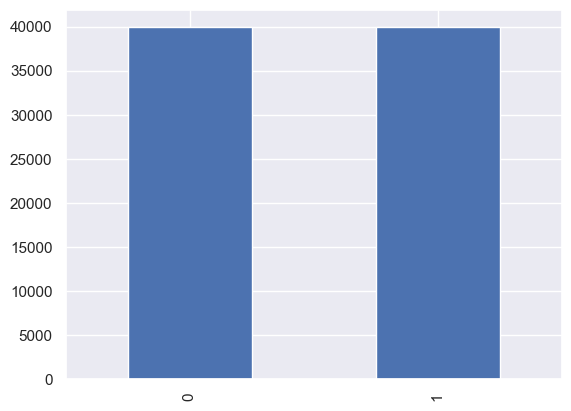

In [67]:
pd.Series(yNew).value_counts().plot(kind='bar') # Use bar chart to display data that has been balanced

## Creating Training Set and Test Set in ratio of 70:30

In [68]:
from sklearn.model_selection import train_test_split

# Here X contains independent attribues and Y contain target/dependent attribute
XTrain, XTest, YTrain, YTest = train_test_split(bankdf.drop('Target', axis=1), bankdf['Target'], test_size = .3,
                                               random_state = 8) # random state is used to maintain consistency
XTrain.shape, XTest.shape

((31647, 15), (13564, 15))

# Creating Ensemble Model

### Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
LRModel = logreg.fit(XTrain, YTrain)

In [70]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
TrSLRPred = LRModel.predict(XTrain)
TeSLRPred = LRModel.predict(XTest)
TrSAccLR = accuracy_score(YTrain, TrSLRPred)
TeSAccLR = accuracy_score(YTest, TeSLRPred)
TeSRecLR = recall_score(YTest, TeSLRPred)
TeSPreLR = precision_score(YTest, TeSLRPred)
ResultsDf = pd.DataFrame({'Method': ['Logistic Regression'], 'TrainingAccuracy': [TrSAccLR], 'TestAccuracy': TeSAccLR,
                         'TestRecall': TeSRecLR, 'TestPrecision': TeSPreLR})
ResultsDf = ResultsDf[['Method', 'TrainingAccuracy', 'TestAccuracy', 'TestRecall', 'TestPrecision']]
ResultsDf

Method  TrainingAccuracy  TestAccuracy  TestRecall  \
0  Logistic Regression          0.891459      0.886096    0.186725   

   TestPrecision  
0       0.562617

### GaussianNB: 

In [71]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
GNBModel = gnb.fit(XTrain, YTrain)

In [72]:
TrSGNBPred = GNBModel.predict(XTrain)
TeSGNBPred = GNBModel.predict(XTest)
TrSAccGNB = accuracy_score(YTrain, TrSGNBPred)
TeSAccGNB = accuracy_score(YTest, TeSGNBPred)
TeSRecGNB = recall_score(YTest, TeSGNBPred)
TeSPreGNB = precision_score(YTest, TeSGNBPred)
TempResultsDf = pd.DataFrame({'Method': ['Gaussian NB'], 'TrainingAccuracy': [TrSAccGNB], 'TestAccuracy': TeSAccGNB,
                         'TestRecall': TeSRecGNB, 'TestPrecision': TeSPreGNB})
ResultsDf = pd.concat([ResultsDf, TempResultsDf])
ResultsDf

Method  TrainingAccuracy  TestAccuracy  TestRecall  \
0  Logistic Regression          0.891459      0.886096    0.186725   
0          Gaussian NB          0.860682      0.855647    0.491315   

   TestPrecision  
0       0.562617  
0       0.410363

### Desicion Tree:

In [73]:
from sklearn.tree import DecisionTreeClassifier

model_entropy = DecisionTreeClassifier(criterion='entropy')
DTModel = model_entropy.fit(XTrain, YTrain)

In [74]:
TrSDTPred = DTModel.predict(XTrain)
TeSDTPred = DTModel.predict(XTest)
TrSAccDT = accuracy_score(YTrain, TrSDTPred)
TeSAccDT = accuracy_score(YTest, TeSDTPred)
TeSRecDT = recall_score(YTrain, TrSDTPred)
TeSPreDT = precision_score(YTest, TeSDTPred)

TempResultsDf = pd.DataFrame({'Method': ['Desicion Tree'], 'TrainingAccuracy': [TrSAccDT], 'TestAccuracy': TeSAccDT,
                         'TestRecall': TeSRecDT, 'TestPrecision': TeSPreDT})
ResultsDf = pd.concat([ResultsDf, TempResultsDf])
ResultsDf

Method  TrainingAccuracy  TestAccuracy  TestRecall  \
0  Logistic Regression          0.891459      0.886096    0.186725   
0          Gaussian NB          0.860682      0.855647    0.491315   
0        Desicion Tree          1.000000      0.878133    1.000000   

   TestPrecision  
0       0.562617  
0       0.410363  
0       0.487369

### Pruned Decision Tree:

In [75]:
prmodel_entropy = DecisionTreeClassifier(criterion='entropy', max_depth = 5, min_samples_leaf = 5)
PrDTModel = prmodel_entropy.fit(XTrain, YTrain)

In [76]:
TrSPrDTPred = DTModel.predict(XTrain)
TeSPrDTPred = DTModel.predict(XTest)
TrSAccPrDT = accuracy_score(YTrain, TrSPrDTPred)
TeSAccPrDT = accuracy_score(YTest, TeSPrDTPred)
TeSRecPrDT = recall_score(YTest, TeSPrDTPred)
TeSPrePrDT = precision_score(YTest, TeSPrDTPred)

TempResultsDf = pd.DataFrame({'Method': ['Pruned Desicion Tree'], 'TrainingAccuracy': [TrSAccPrDT], 'TestAccuracy': TeSAccPrDT,
                         'TestRecall': TeSRecPrDT, 'TestPrecision': TeSPrePrDT})

ResultsDf = pd.concat([ResultsDf, TempResultsDf])
ResultsDf

Method  TrainingAccuracy  TestAccuracy  TestRecall  \
0   Logistic Regression          0.891459      0.886096    0.186725   
0           Gaussian NB          0.860682      0.855647    0.491315   
0         Desicion Tree          1.000000      0.878133    1.000000   
0  Pruned Desicion Tree          1.000000      0.878133    0.490695   

   TestPrecision  
0       0.562617  
0       0.410363  
0       0.487369  
0       0.487369